In [81]:
from math import sin, cos,pi
import numpy as np

In [161]:
def get_rotation_matrix_from_yaw_pitch_roll(yaw,pitch,roll):
    ## according to right hand rule,
    # yaw = z rotation
    # pitch = y rotation
    # roll = x rotation
    alpha = yaw
    beta = pitch
    gamma = roll
    R_x = np.array([[1,0,0],[0,cos(gamma),-sin(gamma)],[0,sin(gamma),cos(gamma)]])
    R_y = np.array([[cos(beta),0,sin(beta)],[0,1,0],[-sin(beta),0,cos(beta)]])
    R_z = np.array([[cos(alpha),-sin(alpha),0],[sin(alpha),cos(alpha),0],[0,0,1]])
    R = R_z @ R_y @ R_x
    return R
def get_rotation_quaternion_from_angular_velocity(angular_velocity):
    if(np.array_equiv(angular_velocity,np.array([0,0,0]))):
        # no rotation
        return [1,0,0,0]
    angle = np.linalg.norm(angular_velocity)
    axis = angular_velocity/angle
    return get_rotation_quaternion_from_axis_angle(angle,axis)
def get_rotation_quaternion_from_axis_angle(angle,axis):
    w = cos(angle/2)
    x,y,z = sin(angle/2)*axis
    return np.array([w,x,y,z])
def get_conjugate_quaternion(quaternion):
    ## if q is unit quaternion, q_inv = q_conj
    w,x,y,z = quaternion
    return np.array([w,-x,-y,-z])
def is_unit_quaternion(quaternion):
    return np.linalg.norm(quaternion)==1
def q_mult(q1,q2):
    ## also known as the Hamilton Product
    w = q1[0]*q2[0]-q1[1]*q2[1]-q1[2]*q2[2]-q1[3]*q2[3]
    x = q1[0]*q2[1]+q1[1]*q2[0]+q1[2]*q2[3]-q1[3]*q2[2]
    y = q1[0]*q2[2]-q1[1]*q2[3]+q1[2]*q2[0]+q1[3]*q2[1]
    z = q1[0]*q2[3]+q1[1]*q2[2]-q1[2]*q2[1]+q1[3]*q2[0]
    return np.array([w,x,y,z])
def rotate_vector_by_quaternion(vector,quaternion):
    vector = np.array([0,vector[0],vector[1],vector[2]])
    return q_mult(q_mult(quaternion,vector),get_conjugate_quaternion(quaternion))
def rotate_basis_by_quaternion(quaternion,basis=np.array([[1,0,0],[0,1,0],[0,0,1]])):
    rotated_basis = []
    for v in basis:
        rotated_basis.append(rotate_vector_by_quaternion(v,quaternion=q)[1:])
    return np.array(rotated_basis).T


In [170]:
angular_velocity = np.array([0,0,10])
q = get_rotation_quaternion_from_angular_velocity(angular_velocity)
print(q)
angular_velocity = np.array([0,23,10])
p = get_rotation_quaternion_from_angular_velocity(angular_velocity)
print(p)
print(q_mult(q,p),q_mult(p,q))
# basis = rotate_basis_by_quaternion(quaternion=q)
# print(basis)
# from pytransform3d.rotations import plot_basis
# from pytransform3d.plot_utils import plot_vector
# ax = plot_basis(ax=None,R=basis)

[ 0.28366219 -0.         -0.         -0.95892427]
[ 0.99965063 -0.         -0.02423938 -0.01053886]
[ 0.27345711 -0.02324373 -0.0068758  -0.96157873] [ 0.27345711  0.02324373 -0.0068758  -0.96157873]


/tmp/ipykernel_6795/1643862687.py:44: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 518.4x320.4 with 0 Axes>

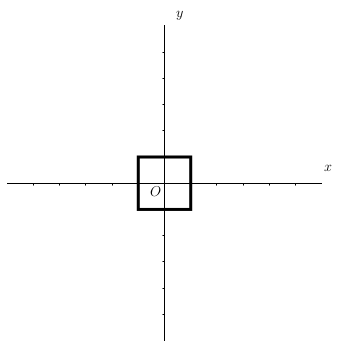

In [222]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2


# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot points
plt.figure(1)
# ax = plt.plot(figsize=(10, 10))

fig, ax = plt.subplots(figsize=(5, 5))
 
fig.patch.set_facecolor('#ffffff')
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)
plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,
         horizontalalignment='center', fontsize=14)
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(ticks=[])
ax.set_yticks(ticks=[])
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
# ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
import matplotlib
matplotlib.use("pgf")
plt.style.use("style.txt")
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((-1,-1),2,2,edgecolor='black',facecolor='none',lw=3))
plt.show()
plt.savefig("fig.pgf")